

1.   데이터셋 생성하기
2.   모델 구성하기
3.   모델 학습과정 설정하기
  - compile()
4.   모델 학습시키기
  - fit()
5.   학습과정 살펴보기
6.   모델 평가하기
  - evaluate()
7.   모델 사용하기
  - predict()



### 0. 사용할 패키지 불러오기

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


### 1. 데이터셋 생성하기

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### 2. 모델 구성하기

In [4]:
model = Sequential()
model.add(Dense(units=64, input_dim = 28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

### 3. 모델 학습과정 설정하기

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

4. 모델 학습시키기

In [6]:
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.6722 - acc: 0.8308
Epoch 2/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3474 - acc: 0.9032
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3000 - acc: 0.9156
Epoch 4/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2713 - acc: 0.9234
Epoch 5/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2497 - acc: 0.9292


### 5. 학습과정 살펴보기

In [7]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[0.6722409146785736, 0.3473636413534482, 0.3000207158545653, 0.27133969992895923, 0.24973305353919664]
[0.8308166666666666, 0.9032166666666667, 0.9155833333333333, 0.9233666666666667, 0.9291666666666667]


In [0]:
import matplotlib.pyplot as plt
#matplolib inline

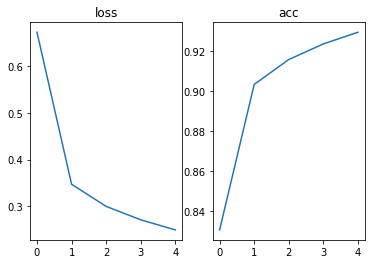

In [19]:

plt.subplot(1,2,1)
plt.title('loss')
plt.plot(hist.history['loss'])
plt.subplot(1,2,2)
plt.title('acc')
plt.plot(hist.history['acc'])
plt.show()

### 6. 모델 평가하기

In [21]:
loss_and_metrics = model.evaluate(x_test,y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 22us/step
## evaluation loss and metrics ##
[0.23442956004142762, 0.934]


7. 모델 사용하기

In [22]:
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[1.9953177e-04 3.6302725e-07 4.3967564e-04 1.9490917e-03 1.8110350e-06
  1.4149232e-04 5.2415327e-08 9.9650598e-01 4.5633806e-05 7.1643537e-04]]


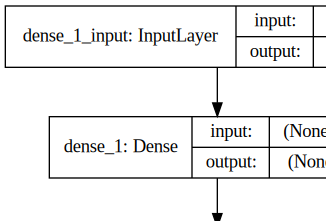

In [25]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

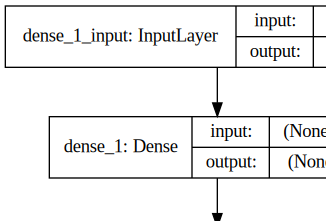

In [26]:
#@title 기본 제목 텍스트
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))